In [1]:
# Built-in
import os
import itertools

# Analysis packages
import scanpy as sc
import numpy as np
import pandas as pd
import sqlalchemy
import memento
from statsmodels.stats.multitest import multipletests

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sb

# Set number of cores to use
sc.settings.n_jobs = 4

sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==0.24.2 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
# Set autoreload settings. With this code,
# changing settings.py (see next cell) automatically loads the new settings in here too.
%load_ext autoreload
%autoreload 1

In [1]:
# Modify settings from this file (figure path, subsetting settings, etc)
# The file is located in this directory (settings.py)
%aimport settings

UsageError: Line magic function `%aimport` not found.


In [4]:
# read in count matrices post nuclei and gene quality control
adata = sc.read( f"{settings.fig_path}/post-wt-clustering.h5ad")
adata

AnnData object with n_obs × n_vars = 299193 × 24181
    obs: 'time', 'time_str', 'drug', 'sex', 'approx_reads_per_cell', 'date', 'label', 'batch', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'doublet_score', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito', 'percent_ribo', 'leiden'
    var: 'gene_name', 'gene_ids', 'feature_types', 'genome', 'non-unique_names', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'label_colors', 'label_colors_dict', 'label_order', 'log1p', 'scrublet', 'stage_colors_dict', 'stage_order'
    obsm: 'X_pca', 'X_umap'
    layers: 'ds_norm_cts', 'raw-cts_pre-ds'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,time,time_str,drug,sex,approx_reads_per_cell,date,label,batch,sample,n_genes_by_counts,...,total_counts,log1p_total_counts,n_counts,n_genes,doublet_score,log10_gene_counts,log10_UMI_counts,percent_mito,percent_ribo,leiden
AAACCCAAGTAGACAT-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3991,...,17264.0,9.756436,17264.0,4020,0.018405,3.604334,4.245093,0.002502,0.001479,1
AAACCCAAGTATCCTG-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3357,...,8862.0,9.089641,8862.0,3383,0.007324,3.529302,3.968296,0.000215,0.002689,8
AAACCCACAAGGATGC-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3930,...,12117.0,9.402448,12120.0,3951,0.011114,3.596927,4.089269,0.000244,0.001547,11
AAACCCACAATTAGGA-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,4313,...,18289.0,9.814110,18289.0,4334,0.051054,3.636889,4.274758,0.000212,0.001115,0
AAACCCACAGCCGTCA-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,1375,...,2398.0,7.782807,2398.0,1392,0.008281,3.143639,3.389698,0.003669,0.004892,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTATGTGTC-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,3421,...,13477.0,9.508814,13477.0,3454,0.014776,3.538322,4.142921,0.001079,0.002087,0
TTTGTTGGTCGGCACT-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,887,...,1497.0,7.311886,1498.0,898,0.020126,2.953760,3.191451,0.003218,0.003861,4
TTTGTTGTCCTAAACG-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,1111,...,2052.0,7.627058,2052.0,1119,0.016110,3.048830,3.326950,0.000942,0.003297,4
TTTGTTGTCGACGCGT-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,4010,...,15712.0,9.662244,15712.0,4041,0.028529,3.606596,4.207366,0.000186,0.002047,1


# Load Sequencing Saturation

In [6]:
samples = pd.read_csv("../PsiloKet snRNA Seq (2022-11-19).csv").astype({"Mouse ID": str})
# Select samples with NO reason for exclusion
samples = samples[samples["Reason for Exclusion"].isna()]

# Swapped sex
samples.loc[np.isin(samples['Mouse ID'], ["470"]), 'Sex'] = 'M'

samples["label"] = samples["Timepoint"] + "_" + samples["Drug"] + "_" + samples["Sex"] + "_" + samples["Mouse ID"]
# Only keep necessary columns
samples = samples[["label", "Seq ID"]]
samples.head()

,label,Seq ID
0,0h_none_F_346,6155-CL-1
1,0h_none_F_347,6128-CL-1
2,0h_none_F_465,6881-CL-1
3,0h_none_F_467,6881-CL-2
5,0h_none_M_291,5889-CL-1


In [7]:
# Read sequencing saturation
metrics = pd.read_csv("../10x_metrics.csv").set_index("Sample")
# Convert 40.5% to 0.405
metrics["Sequencing Saturation"] = metrics["Sequencing Saturation"].str.rstrip('%').astype('float') / 100.0
# Using only the columns we care about
metrics = metrics[["Sequencing Saturation"]]
metrics.head()

,Sequencing Saturation
Sample,
6155-CL-1,0.405
6128-CL-1,0.634
6881-CL-1,0.527
6881-CL-2,0.497
5905-CL-1,0.853


In [8]:
# Add Seq ID to adata.obs
adata.obs = (adata.obs.reset_index() # Reset index into a column so that it is not lost
             .merge(samples, how='left', on="label") # Add Seq ID
             .merge(metrics, how='left', left_on="Seq ID", right_index=True) # Add Sequencing Saturation
             .set_index("index")) # Re-add index

# 0.25 as specified by memento docs for 10x v3
adata.obs['capture_rate'] = 0.25 * adata.obs['Sequencing Saturation']
adata.obs

,time,time_str,drug,sex,approx_reads_per_cell,date,label,batch,sample,n_genes_by_counts,...,n_genes,doublet_score,log10_gene_counts,log10_UMI_counts,percent_mito,percent_ribo,leiden,Seq ID,Sequencing Saturation,capture_rate
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGTAGACAT-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3991,...,4020,0.018405,3.604334,4.245093,0.002502,0.001479,1,6155-CL-1,0.405,0.10125
AAACCCAAGTATCCTG-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3357,...,3383,0.007324,3.529302,3.968296,0.000215,0.002689,8,6155-CL-1,0.405,0.10125
AAACCCACAAGGATGC-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,3930,...,3951,0.011114,3.596927,4.089269,0.000244,0.001547,11,6155-CL-1,0.405,0.10125
AAACCCACAATTAGGA-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,4313,...,4334,0.051054,3.636889,4.274758,0.000212,0.001115,0,6155-CL-1,0.405,0.10125
AAACCCACAGCCGTCA-1-0h_none_F_346,0,0,none,F,25K,4/5/22,0h_none_F_346,6155,0,1375,...,1392,0.008281,3.143639,3.389698,0.003669,0.004892,13,6155-CL-1,0.405,0.10125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTATGTGTC-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,3421,...,3454,0.014776,3.538322,4.142921,0.001079,0.002087,0,6163-CL-4,0.431,0.10775
TTTGTTGGTCGGCACT-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,887,...,898,0.020126,2.953760,3.191451,0.003218,0.003861,4,6163-CL-4,0.431,0.10775
TTTGTTGTCCTAAACG-1-72h_Ket_M_334,72,72,Ket,M,25K,4/19/22,72h_Ket_M_334,6163,41,1111,...,1119,0.016110,3.048830,3.326950,0.000942,0.003297,4,6163-CL-4,0.431,0.10775


# Simple Memento Test

In [12]:
cluster = "0"
drug = "Ket"
time = "24"

subset = adata[(adata.obs["leiden"] == cluster) &
               (np.isin(adata.obs["drug"], [drug, "none"])) &
               (np.isin(adata.obs["time_str"], [time, "0"]))]

subset.obs["stim"] = (subset.obs["drug"] == drug).astype(int)


/tmp/ipykernel_818131/3097586924.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs["stim"] = (subset.obs["drug"] == drug).astype(int)


In [ ]:
result_1d = memento.binary_test_1d(adata=subset,
                                   # Multiple by 0.25 because this is 10x v3
                                   capture_rate=0.25 * subset.obs["Sequencing Saturation"].mean(),
                                   treatment_col="stim",
                                   num_cpus=36,
                                   num_boot=5000
                                  )

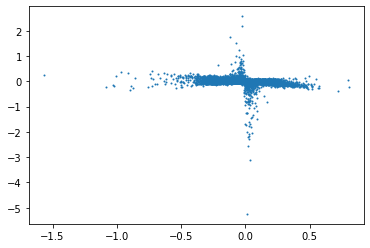

In [12]:
plt.scatter(result_1d.de_coef, result_1d.dv_coef, s=1)

In [15]:
result_1d.query('dv_coef > 0 & de_coef > 0').sort_values('dv_pval').head(20)

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval
4805,Prrt1,stim,0.251938,0.023796,0.000036,0.106884,0.015846,0.000010
10870,Tox3,stim,0.293353,0.036692,0.000040,0.117051,0.020486,0.000067
3676,Cdh9,stim,0.185941,0.033702,0.001223,0.125046,0.021129,0.000070
11702,Mir6236,stim,0.461904,0.037989,0.000004,0.140997,0.020863,0.000073
5635,Glis3,stim,0.225014,0.039924,0.000135,0.106514,0.021599,0.000077
251,Ttll4,stim,0.150106,0.028152,0.000185,0.077590,0.015985,0.000106
5880,Commd3,stim,0.201146,0.032343,0.000641,0.094739,0.017269,0.000115
11192,Dpy19l1,stim,0.126862,0.021959,0.000054,0.080206,0.015589,0.000156
4621,Zfp945,stim,0.202027,0.032570,0.000596,0.085832,0.017339,0.000166
9466,Gpr162,stim,0.217832,0.034328,0.000199,0.126487,0.019527,0.000182


In [13]:
result_1d.query('de_coef > 0').sort_values('de_pval').head(20)

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval
11780,Gm47135,stim,0.497295,0.038087,0.000002,0.206461,0.019586,0.000442
11702,Mir6236,stim,0.461904,0.037989,0.000004,0.140997,0.020863,0.000073
4656,Snhg9,stim,0.548097,0.059458,0.000010,0.077624,0.020967,0.001252
11247,Ubash3b,stim,0.301352,0.053882,0.000011,0.018123,0.021357,0.391522
2000,Hap1,stim,0.278887,0.032621,0.000012,0.091407,0.017412,0.001151
4696,Rgs11,stim,0.200326,0.031492,0.000014,0.076004,0.017735,0.002009
545,Gas5,stim,0.202062,0.029320,0.000015,0.098989,0.017634,0.001270
2749,Itgb8,stim,0.240954,0.026973,0.000015,0.076869,0.013516,0.001475
4353,Slc15a2,stim,0.799119,0.060106,0.000020,0.068403,0.021726,0.002999
5901,Spopl,stim,0.157156,0.022660,0.000021,0.045686,0.015516,0.005799


# Memento with covariates Test

In [58]:
cluster = "0"
drug = "Ket"
time = "2"
cols = ["stim", "sex", "batch"]

data = adata.copy()
data = data[(data.obs["leiden"] == cluster) &
            (np.isin(data.obs["drug"], [drug, "none"])) &
            (np.isin(data.obs["time_str"], [time, "0"]))]

data.obs["stim"] = (data.obs["drug"] == drug).astype(int)
# For pd.factorize to work correctly
# FIXME (fixed in non-test code below)
# This does not modify the actual sparse matrix, so it essentially shuffles the data
data.obs = data.obs.sort_values(by="stim", ascending=True)

/tmp/ipykernel_818131/404895686.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs["stim"] = (data.obs["drug"] == drug).astype(int)


In [59]:
for col in cols[1:]:
    data.obs[col] = pd.factorize(data.obs[col])[0].astype(float)
#     data.obs[col] = data.obs[col].astype("category")

In [60]:
data.obs['capture_rate'] = 0.25 * data.obs['Sequencing Saturation']
memento.setup_memento(data, q_column='capture_rate')

In [11]:
data.obs.head()

,time,time_str,drug,sex,approx_reads_per_cell,date,label,batch,n_targets,n_bootstraps,...,log10_gene_counts,log10_UMI_counts,percent_mito,percent_ribo,leiden,Seq ID,Sequencing Saturation,stim,capture_rate,memento_size_factor
index,,,,,,,,,,,,,,,,,,,,,
AAACCCATCCTCAGAA-0h_none_F_346,0,0,none,0.0,25K,4/5/22,0h_none_F_346,0.0,0,0,...,3.497344,4.021107,0.000191,0.001238,3,6155-CL-1,0.405,0,0.10125,1.017056
GTAATCGGTCACTAGT-0h_none_M_469,0,0,none,1.0,25K,NaN,0h_none_M_469,1.0,0,0,...,3.529302,4.048520,0.000000,0.002772,3,6887-CL-1,0.526,0,0.13150,1.197569
GTAACACCACATAACC-0h_none_M_469,0,0,none,1.0,25K,NaN,0h_none_M_469,1.0,0,0,...,3.646306,4.355030,0.000177,0.000883,3,6887-CL-1,0.526,0,0.13150,0.973362
GGTTGTATCCATCTCG-0h_none_M_469,0,0,none,1.0,25K,NaN,0h_none_M_469,1.0,0,0,...,3.470116,3.992023,0.000102,0.001732,3,6887-CL-1,0.526,0,0.13150,1.096864
GGTTGTACATCCGGTG-0h_none_M_469,0,0,none,1.0,25K,NaN,0h_none_M_469,1.0,0,0,...,3.563955,4.134751,0.000953,0.001320,3,6887-CL-1,0.526,0,0.13150,1.019394


In [49]:
memento.create_groups(data, label_columns=cols)

In [50]:
memento.compute_1d_moments(data)

In [14]:
data.shape

(6719, 11248)

In [15]:
sample_meta = memento.get_groups(data)
treatment_df = sample_meta[['stim']]
covariates_df = sample_meta.drop('stim', axis=1)
sample_meta

,stim,sex,batch
sg^0^0.0^0.0,0,0.0,0.0
sg^0^1.0^1.0,0,1.0,1.0
sg^0^0.0^2.0,0,0.0,2.0
sg^0^1.0^3.0,0,1.0,3.0
sg^0^0.0^4.0,0,0.0,4.0
sg^0^0.0^5.0,0,0.0,5.0
sg^1^1.0^6.0,1,1.0,6.0
sg^1^1.0^7.0,1,1.0,7.0
sg^1^0.0^7.0,1,0.0,7.0
sg^1^0.0^8.0,1,0.0,8.0


In [16]:
memento.ht_1d_moments(data, 
                      treatment=treatment_df,
                      covariate=covariates_df,
                      num_boot=5000, 
                      verbose=1,
                      num_cpus=36)

[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 128 tasks      | elapsed:   28.6s
[Parallel(n_jobs=36)]: Done 378 tasks      | elapsed:   33.6s
[Parallel(n_jobs=36)]: Done 728 tasks      | elapsed:   40.1s
[Parallel(n_jobs=36)]: Done 1178 tasks      | elapsed:   48.6s
[Parallel(n_jobs=36)]: Done 1728 tasks      | elapsed:   58.9s
[Parallel(n_jobs=36)]: Done 2378 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 3128 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 3978 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4928 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 5978 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 7128 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 8378 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 9728 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 11248 out of 11248 | elapsed:  3.8min finished


In [17]:
result_1d = memento.get_1d_ht_result(data)

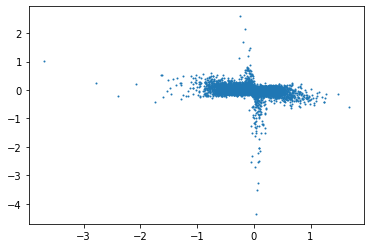

In [18]:
plt.scatter(result_1d.de_coef, result_1d.dv_coef, s=1)

In [19]:
result_1d.query('de_coef > 0').sort_values('de_pval').head(20)

,gene,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval
10138,Cdyl2,stim,0.382928,0.044714,0.000006,-0.368822,0.103437,0.003199
4859,Fem1c,stim,0.668406,0.107216,0.000018,0.225465,0.047421,0.000149
362,Bcl2,stim,0.542349,0.083252,0.000027,0.156935,0.039130,0.000614
2681,Shc3,stim,0.399228,0.071905,0.000034,0.002777,0.036218,0.931014
4836,Arhgap26-1,stim,0.208966,0.034787,0.000046,-0.671236,0.241103,0.013597
10690,Tmem108,stim,0.333540,0.053907,0.000058,-0.160119,0.054804,0.007399
6902,Epha7,stim,0.207261,0.033810,0.000072,-0.617123,0.175565,0.002301
9232,Akap13,stim,0.543101,0.074930,0.000088,0.139220,0.037638,0.001300
282,Pid1,stim,0.375635,0.056716,0.000109,-0.000294,0.041975,0.995601
10348,Sorl1,stim,0.303883,0.042593,0.000124,-0.383627,0.119893,0.003599


In [26]:
# Correct pvals
_, result_1d["de_pval_adj"], _, _ = multipletests(
    result_1d["de_pval"], alpha=0.05, method='fdr_bh'
)

_, result_1d["dv_pval_adj"], _, _ = multipletests(
    result_1d["dv_pval"], alpha=0.05, method='fdr_bh'
)

In [29]:
(result_1d
 .sort_values(by=["de_pval_adj", "dv_pval_adj"])
 .to_csv(f"{settings.fig_path}/memento_initial_results_Ket_2h_cluster3.csv", index=False))


# Memento Analysis

In [62]:
def run_memento(data, numerical_covariates=[], categorical_covariates=[]):
    cols = ["stim"] + numerical_covariates + categorical_covariates
    print("Data Shape:", data.shape)
    memento.setup_memento(data, q_column='capture_rate')
    memento.create_groups(data, label_columns=cols)
    memento.compute_1d_moments(data)
    print("Data Shape after compute_1d_moments:", data.shape)
    
    sample_meta = memento.get_groups(data)
    treatment_df = sample_meta[['stim']]
    covariates_df = sample_meta.drop('stim', axis=1)
    
    memento.ht_1d_moments(data, 
                      treatment=treatment_df,
                      covariate=covariates_df,
                      num_boot=5000, 
                      verbose=1,
                      num_cpus=36)
    result_1d = memento.get_1d_ht_result(data)
    
    # Correct p-vals
    _, result_1d["de_pval_adj"], _, _ = multipletests(
    result_1d["de_pval"], alpha=0.05, method='fdr_bh'
    )

    _, result_1d["dv_pval_adj"], _, _ = multipletests(
        result_1d["dv_pval"], alpha=0.05, method='fdr_bh'
    )
    
    return result_1d.sort_values(by=["de_pval_adj", "dv_pval_adj"])

### Running with time covariate

In [9]:
results = {}

In [ ]:
drugs = ["Ket", "Psilo"]
times = adata.uns["stage_order"][1:] # Skip 0 hours (ctrl)
clusters = np.sort(adata.obs["leiden"].unique())

categorical_covariates = ["sex"]
numerical_covariates = ["time"]

for drug, cluster in itertools.product(drugs, clusters):
    group = f"{drug}_{cluster}"
    print(f"{group} vs ctrl")
    
    if group in results:
        print(f"Skipping {group}, already in results")
        continue
    
    data = adata[(adata.obs["leiden"] == cluster) &
            (np.isin(adata.obs["drug"], [drug, "none"]))].copy()
    data.obs["stim"] = data.obs["drug"].replace({drug: 1, "none": 0})
    
    if data.shape[0] < 100:
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 100 cells")
        continue

    # Make the columns into numbers
    for col in categorical_covariates:
        data.obs[col] = pd.factorize(data.obs[col])[0].astype(float)  
    
    cols = ["stim"] + categorical_covariates + numerical_covariates
    print("Data Shape:", data.shape)
    memento.setup_memento(data, q_column='capture_rate')
    memento.create_groups(data, label_columns=cols)
    
    sizes = data.obs.groupby(cols).size()
    if ((sizes > 0) & (sizes < 10)).any():
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 10 cells in some groups")
        continue
    
    memento.compute_1d_moments(data)
    print("Data Shape after compute_1d_moments:", data.shape)
    
    sample_meta = memento.get_groups(data)
    treatment_df = sample_meta[['stim']]
    covariates_df = sample_meta.drop('stim', axis=1)
    
    memento.ht_1d_moments(data, 
                          treatment=treatment_df,
                          covariate=covariates_df,
                          num_boot=5000, 
                          verbose=1,
                          num_cpus=36)
    
    result_1d = memento.get_1d_ht_result(data)
    
    # Correct p-vals
    _, result_1d["de_pval_adj"], _, _ = multipletests(
    result_1d["de_pval"], alpha=0.05, method='fdr_bh'
    )

    _, result_1d["dv_pval_adj"], _, _ = multipletests(
        result_1d["dv_pval"], alpha=0.05, method='fdr_bh'
    )
    
    results[group] = result_1d.sort_values(by=["de_pval_adj", "dv_pval_adj"])


Ket_0 vs ctrl
Data Shape: (25742, 24181)
Data Shape after compute_1d_moments: (25742, 12256)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 128 tasks      | elapsed:   26.2s
[Parallel(n_jobs=36)]: Done 378 tasks      | elapsed:   47.4s
[Parallel(n_jobs=36)]: Done 728 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 1178 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 1728 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 2378 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 3128 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 3978 tasks      | elapsed:  5.4min
[Parallel(n_jobs=36)]: Done 4928 tasks      | elapsed:  6.4min
[Parallel(n_jobs=36)]: Done 5978 tasks      | elapsed:  7.7min
[Parallel(n_jobs=36)]: Done 7128 tasks      | elapsed:  9.2min
[Parallel(n_jobs=36)]: Done 8378 tasks      | elapsed: 10.7min
[Parallel(n_jobs=36)]: Done 9728 tasks      | elapsed: 12.6min
[Parallel(n_jobs=36)]: Done 11178 tasks      | elapsed: 14.4min
[Parallel(n_jobs=36)]: Done 12256 out of 12

Ket_1 vs ctrl
Data Shape: (23038, 24181)
Data Shape after compute_1d_moments: (23038, 11706)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 128 tasks      | elapsed:    9.9s
[Parallel(n_jobs=36)]: Done 378 tasks      | elapsed:   25.3s
[Parallel(n_jobs=36)]: Done 728 tasks      | elapsed:   48.0s
[Parallel(n_jobs=36)]: Done 1178 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 1728 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 2378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 3128 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 3978 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 4928 tasks      | elapsed:  5.1min
[Parallel(n_jobs=36)]: Done 5978 tasks      | elapsed:  6.1min
[Parallel(n_jobs=36)]: Done 7128 tasks      | elapsed:  7.3min


In [ ]:
# Write results to Excel
for drug in drugs:
    with pd.ExcelWriter(f"{settings.fig_path}/memento_DE_{drug}_time_covariate.xlsx", engine="openpyxl") as writer:
        for cluster in clusters:
            results[f"{drug}_{cluster}"].to_excel(writer, sheet_name = f"Cluster {cluster}")

In [ ]:
test = results["Psilo_0"]
test["log_de_pval"] = -np.log(test["de_pval"])
test["log_dv_pval"] = -np.log(test["dv_pval"])

test.head()

In [ ]:
sb.scatterplot(data=test, x="de_coef", y="log_de_pval", linewidth=0, s=3)
plt.show()
sb.scatterplot(data=test, x="dv_coef", y="log_dv_pval")

### Running on all comparisons (sex covariate)

In [ ]:
results = {}

In [ ]:
drugs = ["Ket", "Psilo"]
times = adata.uns["stage_order"][1:] # Skip 0 hours (ctrl)
clusters = np.sort(adata.obs["leiden"].unique())

categorical_covariates = ["sex"]


for time, drug, cluster in itertools.product(times, drugs, clusters):
    group = f"{time}h_{drug}_{cluster}"
    print(f"{group} vs ctrl")
    
    if group in results:
        print(f"Skipping {group}, already in results")
        continue
    
    data = adata[(adata.obs["leiden"] == cluster) &
            (np.isin(adata.obs["drug"], [drug, "none"])) &
            (np.isin(adata.obs["time_str"], [time, "0"]))].copy()
    data.obs["stim"] = data.obs["drug"].replace({drug: 1, "none": 0})
    
    if data.shape[0] < 100:
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 100 cells")
        continue

    # Make the columns into numbers
    for col in categorical_covariates:
        data.obs[col] = pd.factorize(data.obs[col])[0].astype(float)  
    
    cols = ["stim"] + categorical_covariates
    print("Data Shape:", data.shape)
    memento.setup_memento(data, q_column='capture_rate')
    memento.create_groups(data, label_columns=cols)
    
    if (data.obs.groupby(cols).size() < 10).any():
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 10 cells in some groups")
        continue
    
    memento.compute_1d_moments(data)
    print("Data Shape after compute_1d_moments:", data.shape)
    
    sample_meta = memento.get_groups(data)
    treatment_df = sample_meta[['stim']]
    covariates_df = sample_meta.drop('stim', axis=1)
    
    memento.ht_1d_moments(data, 
                          treatment=treatment_df,
                          covariate=covariates_df,
                          num_boot=5000, 
                          verbose=1,
                          num_cpus=36)
    
    result_1d = memento.get_1d_ht_result(data)
    
    # Correct p-vals
    _, result_1d["de_pval_adj"], _, _ = multipletests(
    result_1d["de_pval"], alpha=0.05, method='fdr_bh'
    )

    _, result_1d["dv_pval_adj"], _, _ = multipletests(
        result_1d["dv_pval"], alpha=0.05, method='fdr_bh'
    )
    
    results[group] = result_1d.sort_values(by=["de_pval_adj", "dv_pval_adj"])


In [ ]:
# Write results to Excel
for time, drug in itertools.product(times, drugs):
    with pd.ExcelWriter(f"{settings.fig_path}/memento_initial_DE_{drug}_{time}h.xlsx", engine="xlsxwriter") as writer:
        for cluster in clusters:
            results[f"{time}h_{drug}_{cluster}"].to_excel(writer, sheet_name = f"Cluster {cluster}")

### Running on all comparisons (no covariates)

In [9]:
results = {}

In [ ]:
drugs = ["Ket", "Psilo"]
times = adata.uns["stage_order"][1:] # Skip 0 hours (ctrl)
clusters = np.sort(adata.obs["leiden"].unique())

for time, drug, cluster in itertools.product(times, drugs, clusters):
    group = f"{time}h_{drug}_{cluster}"
    print(f"{group} vs ctrl")
    
    if group in results:
        print(f"Skipping {group}, already in results")
        continue
    
    data = adata[(adata.obs["leiden"] == cluster) &
            (np.isin(adata.obs["drug"], [drug, "none"])) &
            (np.isin(adata.obs["time_str"], [time, "0"]))].copy()
    data.obs["stim"] = data.obs["drug"].replace({drug: 1, "none": 0})
    
    if data.shape[0] < 100:
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 100 cells")
        continue

    cols = ["stim"]
    print("Data Shape:", data.shape)
    memento.setup_memento(data, q_column='capture_rate')
    memento.create_groups(data, label_columns=cols)
    
    if (data.obs.groupby(cols).size() < 10).any():
        results[group] = pd.DataFrame()
        print(f"Skipping {group}, < 10 cells in some groups")
        continue
    
    memento.compute_1d_moments(data)
    print("Data Shape after compute_1d_moments:", data.shape)
    
    sample_meta = memento.get_groups(data)
    treatment_df = sample_meta[['stim']]
    
    memento.ht_1d_moments(data, 
                          treatment=treatment_df,
                          num_boot=5000, 
                          verbose=1,
                          num_cpus=36)
    
    result_1d = memento.get_1d_ht_result(data)
    
    # Correct p-vals
    _, result_1d["de_pval_adj"], _, _ = multipletests(
    result_1d["de_pval"], alpha=0.05, method='fdr_bh'
    )

    _, result_1d["dv_pval_adj"], _, _ = multipletests(
        result_1d["dv_pval"], alpha=0.05, method='fdr_bh'
    )
    
    results[group] = result_1d.sort_values(by=["de_pval_adj", "dv_pval_adj"])


1h_Ket_0 vs ctrl
Data Shape: (11663, 24181)
Data Shape after compute_1d_moments: (11663, 12428)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 128 tasks      | elapsed:   22.9s
[Parallel(n_jobs=36)]: Done 378 tasks      | elapsed:   33.3s
[Parallel(n_jobs=36)]: Done 728 tasks      | elapsed:   47.7s
[Parallel(n_jobs=36)]: Done 1178 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 1728 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 2378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 3128 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 3978 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 4928 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 5978 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 7128 tasks      | elapsed:  4.9min
[Parallel(n_jobs=36)]: Done 8378 tasks      | elapsed:  5.6min
[Parallel(n_jobs=36)]: Done 9728 tasks      | elapsed:  6.6min
[Parallel(n_jobs=36)]: Done 11178 tasks      | elapsed:  7.5min
[Parallel(n_jobs=36)]: Done 12428 out of 12

1h_Ket_1 vs ctrl
Data Shape: (9991, 24181)
Data Shape after compute_1d_moments: (9991, 11859)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 175 tasks      | elapsed:    6.8s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.5s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   25.2s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   40.4s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   56.8s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  4.8min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.5min
[Parallel(n_jobs=36)]: Done 11859 out of 11

1h_Ket_10 vs ctrl
Data Shape: (2497, 24181)
Data Shape after compute_1d_moments: (2497, 12130)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   17.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   26.0s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   34.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   44.7s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   57.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 12130 out of 12130 | elapsed:  1.5min finished


1h_Ket_11 vs ctrl
Data Shape: (2401, 24181)
Data Shape after compute_1d_moments: (2401, 11533)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.5s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   22.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   30.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   39.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   50.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11533 out of 11533 | elapsed:  1.2min finished


1h_Ket_12 vs ctrl
Data Shape: (2136, 24181)
Data Shape after compute_1d_moments: (2136, 11651)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   32.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   40.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   51.2s
[Parallel(n_jobs=36)]: Done 11580 out of 11651 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11651 out of 11651 | elapsed:  1.0min finished


1h_Ket_13 vs ctrl
Data Shape: (2458, 24181)
Data Shape after compute_1d_moments: (2458, 9041)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   12.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   17.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   23.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   29.9s
[Parallel(n_jobs=36)]: Done 8970 out of 9041 | elapsed:   34.1s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 9041 out of 9041 | elapsed:   34.9s finished


1h_Ket_14 vs ctrl
Data Shape: (1569, 24181)
Data Shape after compute_1d_moments: (1569, 11995)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   16.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   21.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   28.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   36.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   45.3s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   54.9s
[Parallel(n_jobs=36)]: Done 11924 out of 11995 | elapsed:   55.1s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 11995 out of 11995 | elapsed:   55.9s finished


1h_Ket_15 vs ctrl
Data Shape: (691, 24181)
Data Shape after compute_1d_moments: (691, 11694)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    3.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.2s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   12.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   16.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   20.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   25.5s
[Parallel(n_jobs=36)]: Done 11623 out of 11694 | elapsed:   30.2s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11694 out of 11694 | elapsed:   30.4s finished


1h_Ket_16 vs ctrl
Data Shape: (676, 24181)
Data Shape after compute_1d_moments: (676, 12466)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   15.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   20.0s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   25.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   31.5s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   38.3s
[Parallel(n_jobs=36)]: Done 12466 out of 12466 | elapsed:   40.6s finished


1h_Ket_17 vs ctrl
Data Shape: (603, 24181)
Data Shape after compute_1d_moments: (603, 10608)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    8.2s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   17.0s
[Parallel(n_jobs=36)]: Done 10537 out of 10608 | elapsed:   19.6s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10608 out of 10608 | elapsed:   19.8s finished


1h_Ket_18 vs ctrl
Data Shape: (277, 24181)
Data Shape after compute_1d_moments: (277, 9957)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.4s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   11.8s
[Parallel(n_jobs=36)]: Done 9886 out of 9957 | elapsed:   12.6s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9957 out of 9957 | elapsed:   13.5s finished


1h_Ket_19 vs ctrl
Data Shape: (360, 24181)
Data Shape after compute_1d_moments: (360, 9623)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.2s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.1s
[Parallel(n_jobs=36)]: Done 9552 out of 9623 | elapsed:   14.6s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9623 out of 9623 | elapsed:   15.3s finished


1h_Ket_2 vs ctrl
Data Shape: (10144, 24181)
Data Shape after compute_1d_moments: (10144, 12250)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 175 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.4s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   27.0s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   43.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.1min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.9min
[Parallel(n_jobs=36)]: Done 12250 out of 12

1h_Ket_20 vs ctrl
Data Shape: (109, 24181)
Data Shape after compute_1d_moments: (109, 10280)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1804 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 4600 tasks      | elapsed:    4.8s
[Parallel(n_jobs=36)]: Done 8200 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 10280 out of 10280 | elapsed:   10.5s finished


1h_Ket_21 vs ctrl
Skipping 1h_Ket_21, < 100 cells
1h_Ket_3 vs ctrl
Data Shape: (6658, 24181)
Data Shape after compute_1d_moments: (6658, 12534)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   12.0s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   20.2s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   31.7s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   44.6s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.8min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 12534 out of 12

1h_Ket_4 vs ctrl
Data Shape: (6832, 24181)
Data Shape after compute_1d_moments: (6832, 9022)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 623 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   10.6s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   21.0s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   27.7s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   34.9s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   42.7s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   52.9s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 9022 out of 9022 | elapsed:  1.6min finished


1h_Ket_5 vs ctrl
Data Shape: (5174, 24181)
Data Shape after compute_1d_moments: (5174, 12369)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    9.1s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   23.9s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   33.4s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   44.9s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   58.4s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 12369 out of 12

1h_Ket_6 vs ctrl
Data Shape: (4000, 24181)
Data Shape after compute_1d_moments: (4000, 10592)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.5s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   23.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   31.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   41.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   53.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 10592 out of 10592 | elapsed:  1.2min finished


1h_Ket_7 vs ctrl
Data Shape: (3499, 24181)
Data Shape after compute_1d_moments: (3499, 12553)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.5s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   26.2s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   34.9s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   45.6s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   57.2s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 12553 out of 12

1h_Ket_8 vs ctrl
Data Shape: (3590, 24181)
Data Shape after compute_1d_moments: (3590, 12118)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=36)]: Done 627 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   11.6s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   17.1s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   23.4s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   30.4s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   39.1s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   48.1s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   56.9s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 9980 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 11430 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 12118 out of 12

1h_Ket_9 vs ctrl
Data Shape: (2883, 24181)
Data Shape after compute_1d_moments: (2883, 10689)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.2s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   32.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   41.1s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   51.5s
[Parallel(n_jobs=36)]: Done 10618 out of 10689 | elapsed:   55.6s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10689 out of 10689 | elapsed:   56.7s finished


1h_Psilo_0 vs ctrl
Data Shape: (12950, 24181)
Data Shape after compute_1d_moments: (12950, 11910)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:   10.4s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   22.6s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   39.3s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.8min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  5.4min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  6.3min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  7.4min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  8.4min
[Parallel(n_jobs=36)]: Done 11910 out of 11

1h_Psilo_1 vs ctrl
Data Shape: (10326, 24181)
Data Shape after compute_1d_moments: (10326, 11319)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 178 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   28.7s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   46.4s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.0min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.5min
[Parallel(n_jobs=36)]: Done 11319 out of 11319 | elapsed:  6.4min finished


1h_Psilo_10 vs ctrl
Data Shape: (2585, 24181)
Data Shape after compute_1d_moments: (2585, 11654)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   13.3s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   21.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   30.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   40.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   53.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 11583 out of 11654 | elapsed:  1.7min remaining:    0.6s
[Parallel(n_jobs=36)]: Done 11654 out of 11654 | elapsed:  1.7min finished


1h_Psilo_11 vs ctrl
Data Shape: (2519, 24181)
Data Shape after compute_1d_moments: (2519, 11063)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 378 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 728 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 1178 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 1728 tasks      | elapsed:   14.9s
[Parallel(n_jobs=36)]: Done 2378 tasks      | elapsed:   20.1s
[Parallel(n_jobs=36)]: Done 3128 tasks      | elapsed:   26.1s
[Parallel(n_jobs=36)]: Done 3978 tasks      | elapsed:   32.6s
[Parallel(n_jobs=36)]: Done 4928 tasks      | elapsed:   39.1s
[Parallel(n_jobs=36)]: Done 5978 tasks      | elapsed:   47.3s
[Parallel(n_jobs=36)]: Done 7128 tasks      | elapsed:   56.7s
[Parallel(n_jobs=36)]: Done 8378 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 9728 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 11063 out of 11063 | elapsed:  1.5min finished


1h_Psilo_12 vs ctrl
Data Shape: (2196, 24181)
Data Shape after compute_1d_moments: (2196, 11188)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.6s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.0s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   21.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   29.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   38.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   49.2s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 11188 out of 11188 | elapsed:  1.2min finished


1h_Psilo_13 vs ctrl
Data Shape: (1817, 24181)
Data Shape after compute_1d_moments: (1817, 5324)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   10.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   15.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   22.2s
[Parallel(n_jobs=36)]: Done 5324 out of 5324 | elapsed:   26.2s finished


1h_Psilo_14 vs ctrl
Data Shape: (1623, 24181)
Data Shape after compute_1d_moments: (1623, 11430)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.0s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   19.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   25.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   33.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   42.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   53.6s
[Parallel(n_jobs=36)]: Done 11359 out of 11430 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11430 out of 11430 | elapsed:  1.1min finished


1h_Psilo_15 vs ctrl
Data Shape: (702, 24181)
Data Shape after compute_1d_moments: (702, 11419)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   13.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   17.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   22.0s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   27.3s
[Parallel(n_jobs=36)]: Done 11348 out of 11419 | elapsed:   31.6s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11419 out of 11419 | elapsed:   32.2s finished


1h_Psilo_16 vs ctrl
Data Shape: (683, 24181)
Data Shape after compute_1d_moments: (683, 12263)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   16.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   20.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   26.5s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   32.9s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   40.0s
[Parallel(n_jobs=36)]: Done 12192 out of 12263 | elapsed:   41.0s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 12263 out of 12263 | elapsed:   41.5s finished


1h_Psilo_17 vs ctrl
Data Shape: (738, 24181)
Data Shape after compute_1d_moments: (738, 10002)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    3.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   10.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   13.7s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   17.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   21.8s
[Parallel(n_jobs=36)]: Done 9931 out of 10002 | elapsed:   22.0s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 10002 out of 10002 | elapsed:   22.4s finished


1h_Psilo_18 vs ctrl
Data Shape: (237, 24181)
Data Shape after compute_1d_moments: (237, 8080)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 4600 tasks      | elapsed:    6.2s
[Parallel(n_jobs=36)]: Done 8080 out of 8080 | elapsed:   11.0s finished


1h_Psilo_19 vs ctrl
Data Shape: (307, 24181)
Data Shape after compute_1d_moments: (307, 8572)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.7s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 8572 out of 8572 | elapsed:   15.4s finished


1h_Psilo_2 vs ctrl
Data Shape: (10151, 24181)
Data Shape after compute_1d_moments: (10151, 11602)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 179 tasks      | elapsed:    7.9s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   28.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   46.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.8min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.6min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.4min
[Parallel(n_jobs=36)]: Done 11602 out of 11

1h_Psilo_20 vs ctrl
Data Shape: (123, 24181)
Data Shape after compute_1d_moments: (123, 10298)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.3s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    7.9s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   10.9s
[Parallel(n_jobs=36)]: Done 10298 out of 10298 | elapsed:   12.9s finished


1h_Psilo_21 vs ctrl
Skipping 1h_Psilo_21, < 100 cells
1h_Psilo_3 vs ctrl
Data Shape: (6785, 24181)
Data Shape after compute_1d_moments: (6785, 12201)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   13.6s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   22.3s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   34.9s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   48.8s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.8min
[Parallel(n_jobs=36)]: Done 12201 out of 12

1h_Psilo_4 vs ctrl
Data Shape: (5332, 24181)
Data Shape after compute_1d_moments: (5332, 8718)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.3s
[Parallel(n_jobs=36)]: Done 1196 tasks      | elapsed:   10.7s
[Parallel(n_jobs=36)]: Done 1646 tasks      | elapsed:   14.8s
[Parallel(n_jobs=36)]: Done 2196 tasks      | elapsed:   19.3s
[Parallel(n_jobs=36)]: Done 2846 tasks      | elapsed:   24.7s
[Parallel(n_jobs=36)]: Done 3596 tasks      | elapsed:   30.8s
[Parallel(n_jobs=36)]: Done 4446 tasks      | elapsed:   37.7s
[Parallel(n_jobs=36)]: Done 5396 tasks      | elapsed:   45.8s
[Parallel(n_jobs=36)]: Done 6446 tasks      | elapsed:   55.5s
[Parallel(n_jobs=36)]: Done 7596 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 8718 out of 8718 | elapsed:  1.3min finished


1h_Psilo_5 vs ctrl
Data Shape: (5745, 24181)
Data Shape after compute_1d_moments: (5745, 12023)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   11.2s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   18.6s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   29.1s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   40.5s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   53.8s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 12023 out of 12

1h_Psilo_6 vs ctrl
Data Shape: (4089, 24181)
Data Shape after compute_1d_moments: (4089, 9831)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   12.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   19.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   28.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   37.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   50.0s
[Parallel(n_jobs=36)]: Done 7722 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 8672 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 9722 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 9831 out of 9831 | elapsed:  1.4min finished


1h_Psilo_7 vs ctrl
Data Shape: (3727, 24181)
Data Shape after compute_1d_moments: (3727, 12458)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    8.1s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   13.4s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   20.7s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   29.1s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   38.7s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   50.4s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 12458 out of 12

1h_Psilo_8 vs ctrl
Data Shape: (3674, 24181)
Data Shape after compute_1d_moments: (3674, 11601)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   11.9s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   26.2s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   34.9s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   45.2s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   55.8s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 11601 out of 11

1h_Psilo_9 vs ctrl
Data Shape: (2873, 24181)
Data Shape after compute_1d_moments: (2873, 9904)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   21.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   28.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   38.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   49.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 9904 out of 9904 | elapsed:  1.0min finished


2h_Ket_0 vs ctrl
Data Shape: (12715, 24181)
Data Shape after compute_1d_moments: (12715, 12451)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    9.0s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   20.1s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   56.0s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.9min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.8min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.8min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  7.8min
[Parallel(n_jobs=36)]: Done 12451 out of 12

2h_Ket_1 vs ctrl
Data Shape: (11567, 24181)
Data Shape after compute_1d_moments: (11567, 11911)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   29.0s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   46.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.8min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.6min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.4min
[Parallel(n_jobs=36)]: Done 11911 out of 11

2h_Ket_10 vs ctrl
Data Shape: (2763, 24181)
Data Shape after compute_1d_moments: (2763, 12150)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   27.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   36.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   47.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 12079 out of 12150 | elapsed:  1.6min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 12150 out of 12150 | elapsed:  1.6min finished


2h_Ket_11 vs ctrl
Data Shape: (2693, 24181)
Data Shape after compute_1d_moments: (2693, 11571)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   32.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   42.6s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   54.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11571 out of 11571 | elapsed:  1.4min finished


2h_Ket_12 vs ctrl
Data Shape: (2277, 24181)
Data Shape after compute_1d_moments: (2277, 11607)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.2s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   25.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   33.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   42.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   53.3s
[Parallel(n_jobs=36)]: Done 11536 out of 11607 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11607 out of 11607 | elapsed:  1.1min finished


2h_Ket_13 vs ctrl
Data Shape: (2394, 24181)
Data Shape after compute_1d_moments: (2394, 9045)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   13.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   17.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   23.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   30.3s
[Parallel(n_jobs=36)]: Done 9045 out of 9045 | elapsed:   35.2s finished


2h_Ket_14 vs ctrl
Data Shape: (1694, 24181)
Data Shape after compute_1d_moments: (1694, 11899)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   22.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   29.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   37.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   46.8s
[Parallel(n_jobs=36)]: Done 11899 out of 11899 | elapsed:   57.7s finished


2h_Ket_15 vs ctrl
Data Shape: (882, 24181)
Data Shape after compute_1d_moments: (882, 11972)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.2s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   15.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   19.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   25.1s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   31.2s
[Parallel(n_jobs=36)]: Done 11972 out of 11972 | elapsed:   38.3s finished


2h_Ket_16 vs ctrl
Data Shape: (537, 24181)
Data Shape after compute_1d_moments: (537, 11931)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.4s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.1s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    8.5s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   12.4s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   17.5s
[Parallel(n_jobs=36)]: Done 11860 out of 11931 | elapsed:   22.6s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 11931 out of 11931 | elapsed:   23.0s finished


2h_Ket_17 vs ctrl
Data Shape: (724, 24181)
Data Shape after compute_1d_moments: (724, 10441)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.4s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   19.3s
[Parallel(n_jobs=36)]: Done 10441 out of 10441 | elapsed:   22.3s finished


2h_Ket_18 vs ctrl
Data Shape: (255, 24181)
Data Shape after compute_1d_moments: (255, 9285)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 9104 tasks      | elapsed:   11.8s
[Parallel(n_jobs=36)]: Done 9214 out of 9285 | elapsed:   11.9s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9285 out of 9285 | elapsed:   12.1s finished


2h_Ket_19 vs ctrl
Data Shape: (363, 24181)
Data Shape after compute_1d_moments: (363, 9577)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.6s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.7s
[Parallel(n_jobs=36)]: Done 9577 out of 9577 | elapsed:   15.5s finished


2h_Ket_2 vs ctrl
Data Shape: (10186, 24181)
Data Shape after compute_1d_moments: (10186, 12291)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.8s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   42.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   59.4s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.1min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.8min
[Parallel(n_jobs=36)]: Done 12291 out of 12

2h_Ket_20 vs ctrl
Data Shape: (126, 24181)
Data Shape after compute_1d_moments: (126, 10750)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 4600 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 8200 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 10679 out of 10750 | elapsed:   11.3s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10750 out of 10750 | elapsed:   11.5s finished


2h_Ket_21 vs ctrl
Skipping 2h_Ket_21, < 100 cells
2h_Ket_3 vs ctrl
Data Shape: (7219, 24181)
Data Shape after compute_1d_moments: (7219, 12650)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   13.3s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   22.2s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   34.4s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   48.2s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.7min
[Parallel(n_jobs=36)]: Done 12650 out of 12

2h_Ket_4 vs ctrl
Data Shape: (6818, 24181)
Data Shape after compute_1d_moments: (6818, 9253)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 653 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 1016 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 1466 tasks      | elapsed:   16.1s
[Parallel(n_jobs=36)]: Done 2016 tasks      | elapsed:   21.6s
[Parallel(n_jobs=36)]: Done 2666 tasks      | elapsed:   28.2s
[Parallel(n_jobs=36)]: Done 3416 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 4266 tasks      | elapsed:   43.0s
[Parallel(n_jobs=36)]: Done 5216 tasks      | elapsed:   53.0s
[Parallel(n_jobs=36)]: Done 6266 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7416 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8666 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 9253 out of 9253 | elapsed:  1.6min finished


2h_Ket_5 vs ctrl
Data Shape: (6064, 24181)
Data Shape after compute_1d_moments: (6064, 12514)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   17.8s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   27.8s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   38.5s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   51.3s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 12514 out of 12

2h_Ket_6 vs ctrl
Data Shape: (4171, 24181)
Data Shape after compute_1d_moments: (4171, 10569)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 1266 tasks      | elapsed:    9.7s
[Parallel(n_jobs=36)]: Done 1718 tasks      | elapsed:   12.7s
[Parallel(n_jobs=36)]: Done 2268 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 2918 tasks      | elapsed:   20.9s
[Parallel(n_jobs=36)]: Done 3668 tasks      | elapsed:   25.9s
[Parallel(n_jobs=36)]: Done 4518 tasks      | elapsed:   31.2s
[Parallel(n_jobs=36)]: Done 5468 tasks      | elapsed:   37.1s
[Parallel(n_jobs=36)]: Done 6518 tasks      | elapsed:   44.7s
[Parallel(n_jobs=36)]: Done 7668 tasks      | elapsed:   53.1s
[Parallel(n_jobs=36)]: Done 8918 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 10268 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 10569 out of 10569 | elapsed:  1.3min finished


2h_Ket_7 vs ctrl
Data Shape: (4133, 24181)
Data Shape after compute_1d_moments: (4133, 12801)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    8.5s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   14.1s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   21.4s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   30.3s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   40.4s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   52.3s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 12801 out of 12

2h_Ket_8 vs ctrl
Data Shape: (3900, 24181)
Data Shape after compute_1d_moments: (3900, 12093)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=36)]: Done 558 tasks      | elapsed:    7.3s
[Parallel(n_jobs=36)]: Done 908 tasks      | elapsed:   11.2s
[Parallel(n_jobs=36)]: Done 1358 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 1908 tasks      | elapsed:   24.2s
[Parallel(n_jobs=36)]: Done 2558 tasks      | elapsed:   31.7s
[Parallel(n_jobs=36)]: Done 3308 tasks      | elapsed:   40.8s
[Parallel(n_jobs=36)]: Done 4158 tasks      | elapsed:   50.6s
[Parallel(n_jobs=36)]: Done 5108 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 6158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 7308 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8558 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 9908 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 11358 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 12093 out of 12

2h_Ket_9 vs ctrl
Data Shape: (3136, 24181)
Data Shape after compute_1d_moments: (3136, 10534)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   19.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   25.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   34.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   43.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   54.0s
[Parallel(n_jobs=36)]: Done 10463 out of 10534 | elapsed:   57.5s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10534 out of 10534 | elapsed:   58.7s finished


2h_Psilo_0 vs ctrl
Data Shape: (11036, 24181)
Data Shape after compute_1d_moments: (11036, 12524)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    8.5s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   18.0s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   31.0s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   48.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.9min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.8min
[Parallel(n_jobs=36)]: Done 12524 out of 12

2h_Psilo_1 vs ctrl
Data Shape: (9776, 24181)
Data Shape after compute_1d_moments: (9776, 11991)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    6.5s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.4s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   24.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   39.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   55.5s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.0min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  4.7min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.4min
[Parallel(n_jobs=36)]: Done 11991 out of 11

2h_Psilo_10 vs ctrl
Data Shape: (2476, 24181)
Data Shape after compute_1d_moments: (2476, 12230)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   32.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   42.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   54.5s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 12159 out of 12230 | elapsed:  1.4min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 12230 out of 12230 | elapsed:  1.4min finished


2h_Psilo_11 vs ctrl
Data Shape: (2417, 24181)
Data Shape after compute_1d_moments: (2417, 11665)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   22.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   30.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   39.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   50.2s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 11594 out of 11665 | elapsed:  1.2min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11665 out of 11665 | elapsed:  1.3min finished


2h_Psilo_12 vs ctrl
Data Shape: (2084, 24181)
Data Shape after compute_1d_moments: (2084, 11729)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.0s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   23.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   39.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   49.7s
[Parallel(n_jobs=36)]: Done 11658 out of 11729 | elapsed:   59.1s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11729 out of 11729 | elapsed:  1.0min finished


2h_Psilo_13 vs ctrl
Data Shape: (2556, 24181)
Data Shape after compute_1d_moments: (2556, 9246)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 187 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   13.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   18.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   24.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   31.5s
[Parallel(n_jobs=36)]: Done 9175 out of 9246 | elapsed:   36.4s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 9246 out of 9246 | elapsed:   37.1s finished


2h_Psilo_14 vs ctrl
Data Shape: (1589, 24181)
Data Shape after compute_1d_moments: (1589, 12010)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    6.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   10.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   15.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   21.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   27.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   35.2s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   43.9s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   53.5s
[Parallel(n_jobs=36)]: Done 12010 out of 12010 | elapsed:   54.7s finished


2h_Psilo_15 vs ctrl
Data Shape: (720, 24181)
Data Shape after compute_1d_moments: (720, 11800)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   12.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   21.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   26.6s
[Parallel(n_jobs=36)]: Done 11729 out of 11800 | elapsed:   31.8s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11800 out of 11800 | elapsed:   32.4s finished


2h_Psilo_16 vs ctrl
Data Shape: (487, 24181)
Data Shape after compute_1d_moments: (487, 11514)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.3s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   15.4s
[Parallel(n_jobs=36)]: Done 11443 out of 11514 | elapsed:   19.1s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 11514 out of 11514 | elapsed:   20.2s finished


2h_Psilo_17 vs ctrl
Data Shape: (690, 24181)
Data Shape after compute_1d_moments: (690, 10799)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.1s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   13.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 10799 out of 10799 | elapsed:   22.2s finished


2h_Psilo_18 vs ctrl
Data Shape: (274, 24181)
Data Shape after compute_1d_moments: (274, 10019)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    9.0s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   12.5s
[Parallel(n_jobs=36)]: Done 10019 out of 10019 | elapsed:   14.1s finished


2h_Psilo_19 vs ctrl
Data Shape: (359, 24181)
Data Shape after compute_1d_moments: (359, 9869)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.3s
[Parallel(n_jobs=36)]: Done 9869 out of 9869 | elapsed:   15.6s finished


2h_Psilo_2 vs ctrl
Data Shape: (9367, 24181)
Data Shape after compute_1d_moments: (9367, 12350)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 179 tasks      | elapsed:    6.8s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.1s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   24.5s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   39.2s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   54.7s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.0min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  4.7min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.3min
[Parallel(n_jobs=36)]: Done 12350 out of 12

2h_Psilo_20 vs ctrl
Data Shape: (110, 24181)
Data Shape after compute_1d_moments: (110, 10235)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 4600 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 8200 tasks      | elapsed:    8.8s
[Parallel(n_jobs=36)]: Done 10164 out of 10235 | elapsed:   10.7s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10235 out of 10235 | elapsed:   11.1s finished


2h_Psilo_21 vs ctrl
Skipping 2h_Psilo_21, < 100 cells
2h_Psilo_3 vs ctrl
Data Shape: (6127, 24181)
Data Shape after compute_1d_moments: (6127, 12632)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   11.0s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   18.5s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   28.6s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   40.3s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   54.2s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 12632 out of 12

2h_Psilo_4 vs ctrl
Data Shape: (6708, 24181)
Data Shape after compute_1d_moments: (6708, 9312)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 626 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   10.8s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   15.1s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   20.6s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   27.0s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   34.0s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   41.6s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   51.0s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 9312 out of 9312 | elapsed:  1.6min finished


2h_Psilo_5 vs ctrl
Data Shape: (4947, 24181)
Data Shape after compute_1d_moments: (4947, 12501)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    8.6s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   14.3s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   22.3s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   31.1s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   41.5s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   53.6s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 12501 out of 12

2h_Psilo_6 vs ctrl
Data Shape: (3903, 24181)
Data Shape after compute_1d_moments: (3903, 10677)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   22.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   30.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   40.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   51.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 10606 out of 10677 | elapsed:  1.2min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 10677 out of 10677 | elapsed:  1.2min finished


2h_Psilo_7 vs ctrl
Data Shape: (3539, 24181)
Data Shape after compute_1d_moments: (3539, 12861)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.4s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   11.7s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.1s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   25.5s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   33.9s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   44.1s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   55.1s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 12861 out of 12

2h_Psilo_8 vs ctrl
Data Shape: (3521, 24181)
Data Shape after compute_1d_moments: (3521, 12200)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    8.0s
[Parallel(n_jobs=36)]: Done 1088 tasks      | elapsed:   12.5s
[Parallel(n_jobs=36)]: Done 1538 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 2088 tasks      | elapsed:   23.2s
[Parallel(n_jobs=36)]: Done 2738 tasks      | elapsed:   30.1s
[Parallel(n_jobs=36)]: Done 3488 tasks      | elapsed:   38.0s
[Parallel(n_jobs=36)]: Done 4338 tasks      | elapsed:   46.5s
[Parallel(n_jobs=36)]: Done 5288 tasks      | elapsed:   54.7s
[Parallel(n_jobs=36)]: Done 6338 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7488 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8738 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 10088 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 11538 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 12200 out of 

2h_Psilo_9 vs ctrl
Data Shape: (2866, 24181)
Data Shape after compute_1d_moments: (2866, 10770)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.2s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.0s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   40.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   50.3s
[Parallel(n_jobs=36)]: Done 10770 out of 10770 | elapsed:   55.7s finished


4h_Ket_0 vs ctrl
Data Shape: (12563, 24181)
Data Shape after compute_1d_moments: (12563, 12504)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 178 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   20.7s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   36.4s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   57.6s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.9min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.9min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  7.8min
[Parallel(n_jobs=36)]: Done 12504 out of 12

4h_Ket_1 vs ctrl
Data Shape: (10822, 24181)
Data Shape after compute_1d_moments: (10822, 11956)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 175 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   28.5s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   45.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.6min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.4min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.2min
[Parallel(n_jobs=36)]: Done 11956 out of 11

4h_Ket_10 vs ctrl
Data Shape: (2735, 24181)
Data Shape after compute_1d_moments: (2735, 12194)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.1s
[Parallel(n_jobs=36)]: Done 1335 tasks      | elapsed:   11.7s
[Parallel(n_jobs=36)]: Done 1790 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 2340 tasks      | elapsed:   20.0s
[Parallel(n_jobs=36)]: Done 2990 tasks      | elapsed:   25.1s
[Parallel(n_jobs=36)]: Done 3740 tasks      | elapsed:   30.8s
[Parallel(n_jobs=36)]: Done 4590 tasks      | elapsed:   37.0s
[Parallel(n_jobs=36)]: Done 5540 tasks      | elapsed:   44.0s
[Parallel(n_jobs=36)]: Done 6590 tasks      | elapsed:   52.2s
[Parallel(n_jobs=36)]: Done 7740 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 8990 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 10340 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 11790 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 12194 out of 

4h_Ket_11 vs ctrl
Data Shape: (2691, 24181)
Data Shape after compute_1d_moments: (2691, 11631)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   17.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   33.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   43.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   55.4s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 11560 out of 11631 | elapsed:  1.4min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11631 out of 11631 | elapsed:  1.4min finished


4h_Ket_12 vs ctrl
Data Shape: (2340, 24181)
Data Shape after compute_1d_moments: (2340, 11615)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.5s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   20.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   26.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   35.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   44.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   56.3s
[Parallel(n_jobs=36)]: Done 11544 out of 11615 | elapsed:  1.1min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11615 out of 11615 | elapsed:  1.1min finished


4h_Ket_13 vs ctrl
Data Shape: (2121, 24181)
Data Shape after compute_1d_moments: (2121, 8769)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   21.7s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   28.1s
[Parallel(n_jobs=36)]: Done 8698 out of 8769 | elapsed:   31.0s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 8769 out of 8769 | elapsed:   32.1s finished


4h_Ket_14 vs ctrl
Data Shape: (1696, 24181)
Data Shape after compute_1d_moments: (1696, 11950)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   39.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   49.8s
[Parallel(n_jobs=36)]: Done 11879 out of 11950 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11950 out of 11950 | elapsed:  1.0min finished


4h_Ket_15 vs ctrl
Data Shape: (813, 24181)
Data Shape after compute_1d_moments: (813, 11918)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   10.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   23.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   29.0s
[Parallel(n_jobs=36)]: Done 11847 out of 11918 | elapsed:   35.1s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11918 out of 11918 | elapsed:   35.5s finished


4h_Ket_16 vs ctrl
Data Shape: (477, 24181)
Data Shape after compute_1d_moments: (477, 12132)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.4s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   12.5s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 12029 tasks      | elapsed:   22.9s
[Parallel(n_jobs=36)]: Done 12132 out of 12132 | elapsed:   23.3s finished


4h_Ket_17 vs ctrl
Data Shape: (778, 24181)
Data Shape after compute_1d_moments: (778, 10532)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   14.0s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   19.6s
[Parallel(n_jobs=36)]: Done 10461 out of 10532 | elapsed:   22.3s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 10532 out of 10532 | elapsed:   22.7s finished


4h_Ket_18 vs ctrl
Data Shape: (290, 24181)
Data Shape after compute_1d_moments: (290, 9904)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.7s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.1s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    9.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   12.9s
[Parallel(n_jobs=36)]: Done 9833 out of 9904 | elapsed:   13.8s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9904 out of 9904 | elapsed:   14.1s finished


4h_Ket_19 vs ctrl
Data Shape: (361, 24181)
Data Shape after compute_1d_moments: (361, 9542)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.2s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.5s
[Parallel(n_jobs=36)]: Done 9542 out of 9542 | elapsed:   15.3s finished


4h_Ket_2 vs ctrl
Data Shape: (10400, 24181)
Data Shape after compute_1d_moments: (10400, 12349)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 178 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.2s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   28.1s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   44.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.7min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.2min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.6min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.3min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.1min
[Parallel(n_jobs=36)]: Done 12349 out of 12

4h_Ket_20 vs ctrl
Data Shape: (118, 24181)
Data Shape after compute_1d_moments: (118, 10253)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.0s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   10.4s
[Parallel(n_jobs=36)]: Done 10182 out of 10253 | elapsed:   11.5s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10253 out of 10253 | elapsed:   12.6s finished


4h_Ket_21 vs ctrl
Skipping 4h_Ket_21, < 100 cells
4h_Ket_3 vs ctrl
Data Shape: (6962, 24181)
Data Shape after compute_1d_moments: (6962, 12788)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   12.8s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   21.7s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   33.3s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   46.6s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 12788 out of 12

4h_Ket_4 vs ctrl
Data Shape: (6684, 24181)
Data Shape after compute_1d_moments: (6684, 9141)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 590 tasks      | elapsed:    6.5s
[Parallel(n_jobs=36)]: Done 944 tasks      | elapsed:   10.6s
[Parallel(n_jobs=36)]: Done 1394 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 1944 tasks      | elapsed:   21.0s
[Parallel(n_jobs=36)]: Done 2594 tasks      | elapsed:   27.6s
[Parallel(n_jobs=36)]: Done 3344 tasks      | elapsed:   34.7s
[Parallel(n_jobs=36)]: Done 4194 tasks      | elapsed:   42.4s
[Parallel(n_jobs=36)]: Done 5144 tasks      | elapsed:   52.1s
[Parallel(n_jobs=36)]: Done 6194 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 7344 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8594 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 9141 out of 9141 | elapsed:  1.6min finished


4h_Ket_5 vs ctrl
Data Shape: (5737, 24181)
Data Shape after compute_1d_moments: (5737, 12540)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   10.3s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   17.3s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   27.2s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   37.5s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   49.9s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.7min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 12540 out of 12

4h_Ket_6 vs ctrl
Data Shape: (4650, 24181)
Data Shape after compute_1d_moments: (4650, 10472)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   18.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   26.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   36.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   47.6s
[Parallel(n_jobs=36)]: Done 7826 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 8780 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 9830 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 10472 out of 10472 | elapsed:  1.4min finished


4h_Ket_7 vs ctrl
Data Shape: (3974, 24181)
Data Shape after compute_1d_moments: (3974, 12996)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    8.2s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   13.6s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   20.8s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   29.9s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   39.7s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   51.3s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 12836 tasks    

4h_Ket_8 vs ctrl
Data Shape: (3828, 24181)
Data Shape after compute_1d_moments: (3828, 12148)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   17.6s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   24.8s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   32.7s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   42.1s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   52.4s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 12148 out of 12

4h_Ket_9 vs ctrl
Data Shape: (3285, 24181)
Data Shape after compute_1d_moments: (3285, 10521)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.2s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   14.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   20.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   27.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   36.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   46.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   57.9s
[Parallel(n_jobs=36)]: Done 10450 out of 10521 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10521 out of 10521 | elapsed:  1.1min finished


4h_Psilo_0 vs ctrl
Data Shape: (12195, 24181)
Data Shape after compute_1d_moments: (12195, 12608)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    8.7s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   19.6s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   34.2s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   54.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  4.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.7min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.5min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.5min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  7.4min
[Parallel(n_jobs=36)]: Done 12608 out of 12

4h_Psilo_1 vs ctrl
Data Shape: (10372, 24181)
Data Shape after compute_1d_moments: (10372, 11994)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.1s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.1s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   58.5s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 11994 out of 11

4h_Psilo_10 vs ctrl
Data Shape: (2748, 24181)
Data Shape after compute_1d_moments: (2748, 12249)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   18.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   26.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   46.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   59.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 12178 out of 12249 | elapsed:  1.5min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 12249 out of 12249 | elapsed:  1.6min finished


4h_Psilo_11 vs ctrl
Data Shape: (2600, 24181)
Data Shape after compute_1d_moments: (2600, 11628)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.2s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   23.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   31.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   41.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   53.1s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11557 out of 11628 | elapsed:  1.3min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11628 out of 11628 | elapsed:  1.3min finished


4h_Psilo_12 vs ctrl
Data Shape: (2348, 24181)
Data Shape after compute_1d_moments: (2348, 11742)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   19.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   25.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   33.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   42.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   53.0s
[Parallel(n_jobs=36)]: Done 11742 out of 11742 | elapsed:  1.1min finished


4h_Psilo_13 vs ctrl
Data Shape: (2490, 24181)
Data Shape after compute_1d_moments: (2490, 8968)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   12.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   22.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   29.7s
[Parallel(n_jobs=36)]: Done 8897 out of 8968 | elapsed:   33.5s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 8968 out of 8968 | elapsed:   34.2s finished


4h_Psilo_14 vs ctrl
Data Shape: (1755, 24181)
Data Shape after compute_1d_moments: (1755, 12031)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.4s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   17.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   22.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   29.6s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   37.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   47.5s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   57.5s
[Parallel(n_jobs=36)]: Done 11960 out of 12031 | elapsed:   58.0s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 12031 out of 12031 | elapsed:   59.0s finished


4h_Psilo_15 vs ctrl
Data Shape: (730, 24181)
Data Shape after compute_1d_moments: (730, 11742)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   12.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   21.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   26.4s
[Parallel(n_jobs=36)]: Done 11742 out of 11742 | elapsed:   32.1s finished


4h_Psilo_16 vs ctrl
Data Shape: (523, 24181)
Data Shape after compute_1d_moments: (523, 11026)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.4s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.8s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    8.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   16.8s
[Parallel(n_jobs=36)]: Done 10955 out of 11026 | elapsed:   20.0s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 11026 out of 11026 | elapsed:   20.5s finished


4h_Psilo_17 vs ctrl
Data Shape: (746, 24181)
Data Shape after compute_1d_moments: (746, 10508)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.8s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.8s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   14.4s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   20.0s
[Parallel(n_jobs=36)]: Done 10437 out of 10508 | elapsed:   22.6s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 10508 out of 10508 | elapsed:   23.0s finished


4h_Psilo_18 vs ctrl
Data Shape: (417, 24181)
Data Shape after compute_1d_moments: (417, 10197)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.2s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.2s
[Parallel(n_jobs=36)]: Done 10197 out of 10197 | elapsed:   16.1s finished


4h_Psilo_19 vs ctrl
Data Shape: (316, 24181)
Data Shape after compute_1d_moments: (316, 9449)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.5s
[Parallel(n_jobs=36)]: Done 9449 out of 9449 | elapsed:   15.1s finished


4h_Psilo_2 vs ctrl
Data Shape: (9868, 24181)
Data Shape after compute_1d_moments: (9868, 12428)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 178 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.3s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.4s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.6s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   58.4s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 12428 out of 12

4h_Psilo_20 vs ctrl
Data Shape: (128, 24181)
Data Shape after compute_1d_moments: (128, 10873)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.1s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   10.8s
[Parallel(n_jobs=36)]: Done 10873 out of 10873 | elapsed:   12.9s finished


4h_Psilo_21 vs ctrl
Skipping 4h_Psilo_21, < 100 cells
4h_Psilo_3 vs ctrl
Data Shape: (6772, 24181)
Data Shape after compute_1d_moments: (6772, 12782)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   12.4s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   21.1s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   32.4s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   46.0s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.9min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 12782 out of 12

4h_Psilo_4 vs ctrl
Data Shape: (6491, 24181)
Data Shape after compute_1d_moments: (6491, 9169)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 651 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 1016 tasks      | elapsed:   10.6s
[Parallel(n_jobs=36)]: Done 1466 tasks      | elapsed:   15.1s
[Parallel(n_jobs=36)]: Done 2016 tasks      | elapsed:   20.4s
[Parallel(n_jobs=36)]: Done 2666 tasks      | elapsed:   26.4s
[Parallel(n_jobs=36)]: Done 3416 tasks      | elapsed:   33.2s
[Parallel(n_jobs=36)]: Done 4266 tasks      | elapsed:   40.2s
[Parallel(n_jobs=36)]: Done 5216 tasks      | elapsed:   49.9s
[Parallel(n_jobs=36)]: Done 6266 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 7416 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 8666 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 9169 out of 9169 | elapsed:  1.5min finished


4h_Psilo_5 vs ctrl
Data Shape: (5531, 24181)
Data Shape after compute_1d_moments: (5531, 12588)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   16.0s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   24.9s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   35.0s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   46.6s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   60.0s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 12588 out of 12

4h_Psilo_6 vs ctrl
Data Shape: (5201, 24181)
Data Shape after compute_1d_moments: (5201, 10657)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 1088 tasks      | elapsed:   10.2s
[Parallel(n_jobs=36)]: Done 1538 tasks      | elapsed:   13.5s
[Parallel(n_jobs=36)]: Done 2088 tasks      | elapsed:   18.1s
[Parallel(n_jobs=36)]: Done 2738 tasks      | elapsed:   23.3s
[Parallel(n_jobs=36)]: Done 3488 tasks      | elapsed:   29.0s
[Parallel(n_jobs=36)]: Done 4338 tasks      | elapsed:   35.4s
[Parallel(n_jobs=36)]: Done 5288 tasks      | elapsed:   42.9s
[Parallel(n_jobs=36)]: Done 6338 tasks      | elapsed:   51.9s
[Parallel(n_jobs=36)]: Done 7488 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 8738 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 10088 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 10657 out of 10657 | elapsed:  1.5min finished


4h_Psilo_7 vs ctrl
Data Shape: (3953, 24181)
Data Shape after compute_1d_moments: (3953, 12913)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.4s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   13.5s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   20.6s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   29.2s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   38.7s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   50.0s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 12913 out of 12

4h_Psilo_8 vs ctrl
Data Shape: (3791, 24181)
Data Shape after compute_1d_moments: (3791, 12197)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=36)]: Done 626 tasks      | elapsed:    7.7s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   11.7s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   23.7s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   30.9s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   39.3s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   48.7s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   58.1s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 9980 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 11430 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 12197 out of 12

4h_Psilo_9 vs ctrl
Data Shape: (3424, 24181)
Data Shape after compute_1d_moments: (3424, 10589)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   14.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   20.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   27.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   36.0s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   45.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   57.3s
[Parallel(n_jobs=36)]: Done 10518 out of 10589 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10589 out of 10589 | elapsed:  1.0min finished


24h_Ket_0 vs ctrl
Data Shape: (11846, 24181)
Data Shape after compute_1d_moments: (11846, 12602)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    8.2s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   18.5s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   32.1s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   51.1s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.8min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.1min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  7.0min
[Parallel(n_jobs=36)]: Done 12602 out of 12

24h_Ket_1 vs ctrl
Data Shape: (10138, 24181)
Data Shape after compute_1d_moments: (10138, 11966)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 174 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.4s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   24.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   40.1s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   56.0s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  4.8min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.4min
[Parallel(n_jobs=36)]: Done 11966 out of 11

24h_Ket_10 vs ctrl
Data Shape: (2501, 24181)
Data Shape after compute_1d_moments: (2501, 12187)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   32.4s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   54.1s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 12187 out of 12187 | elapsed:  1.4min finished


24h_Ket_11 vs ctrl
Data Shape: (2479, 24181)
Data Shape after compute_1d_moments: (2479, 11589)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    9.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.5s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   22.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   30.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   50.1s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 11518 out of 11589 | elapsed:  1.2min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11589 out of 11589 | elapsed:  1.2min finished


24h_Ket_12 vs ctrl
Data Shape: (2151, 24181)
Data Shape after compute_1d_moments: (2151, 11634)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   17.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   23.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   39.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   50.0s
[Parallel(n_jobs=36)]: Done 11563 out of 11634 | elapsed:   59.0s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11634 out of 11634 | elapsed:  1.0min finished


24h_Ket_13 vs ctrl
Data Shape: (2158, 24181)
Data Shape after compute_1d_moments: (2158, 8901)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    8.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   15.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   21.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   27.4s
[Parallel(n_jobs=36)]: Done 8830 out of 8901 | elapsed:   30.6s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 8901 out of 8901 | elapsed:   31.4s finished


24h_Ket_14 vs ctrl
Data Shape: (1659, 24181)
Data Shape after compute_1d_moments: (1659, 12005)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   16.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   21.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   28.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   36.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   45.6s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   55.2s
[Parallel(n_jobs=36)]: Done 11934 out of 12005 | elapsed:   55.4s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 12005 out of 12005 | elapsed:   56.3s finished


24h_Ket_15 vs ctrl
Data Shape: (755, 24181)
Data Shape after compute_1d_moments: (755, 11934)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   13.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   17.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   21.8s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   27.3s
[Parallel(n_jobs=36)]: Done 11934 out of 11934 | elapsed:   33.2s finished


24h_Ket_16 vs ctrl
Data Shape: (501, 24181)
Data Shape after compute_1d_moments: (501, 11684)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.6s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   15.6s
[Parallel(n_jobs=36)]: Done 11684 out of 11684 | elapsed:   20.1s finished


24h_Ket_17 vs ctrl
Data Shape: (681, 24181)
Data Shape after compute_1d_moments: (681, 10496)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.6s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.1s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   13.4s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 10425 out of 10496 | elapsed:   21.2s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10496 out of 10496 | elapsed:   21.5s finished


24h_Ket_18 vs ctrl
Data Shape: (320, 24181)
Data Shape after compute_1d_moments: (320, 9633)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   12.7s
[Parallel(n_jobs=36)]: Done 9633 out of 9633 | elapsed:   13.4s finished


24h_Ket_19 vs ctrl
Data Shape: (294, 24181)
Data Shape after compute_1d_moments: (294, 8900)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.8s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.2s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    9.4s
[Parallel(n_jobs=36)]: Done 8900 out of 8900 | elapsed:   12.8s finished


24h_Ket_2 vs ctrl
Data Shape: (10212, 24181)
Data Shape after compute_1d_moments: (10212, 12411)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.1s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.3s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   58.3s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 12411 out of 12

24h_Ket_20 vs ctrl
Data Shape: (109, 24181)
Data Shape after compute_1d_moments: (109, 9938)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    4.5s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:    9.3s
[Parallel(n_jobs=36)]: Done 9867 out of 9938 | elapsed:   10.0s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9938 out of 9938 | elapsed:   10.2s finished


24h_Ket_21 vs ctrl
Skipping 24h_Ket_21, < 100 cells
24h_Ket_3 vs ctrl
Data Shape: (6524, 24181)
Data Shape after compute_1d_moments: (6524, 12809)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   11.6s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   19.5s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   29.9s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   42.1s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   56.3s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 12809 out of 12

24h_Ket_4 vs ctrl
Data Shape: (6213, 24181)
Data Shape after compute_1d_moments: (6213, 9062)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 1160 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 1610 tasks      | elapsed:   15.7s
[Parallel(n_jobs=36)]: Done 2160 tasks      | elapsed:   20.8s
[Parallel(n_jobs=36)]: Done 2810 tasks      | elapsed:   26.3s
[Parallel(n_jobs=36)]: Done 3560 tasks      | elapsed:   32.5s
[Parallel(n_jobs=36)]: Done 4410 tasks      | elapsed:   39.7s
[Parallel(n_jobs=36)]: Done 5360 tasks      | elapsed:   48.9s
[Parallel(n_jobs=36)]: Done 6410 tasks      | elapsed:   59.2s
[Parallel(n_jobs=36)]: Done 7560 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 8810 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 9062 out of 9062 | elapsed:  1.4min finished


24h_Ket_5 vs ctrl
Data Shape: (5328, 24181)
Data Shape after compute_1d_moments: (5328, 12614)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   15.2s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   23.6s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   32.8s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   43.8s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   56.1s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.7min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 12614 out of 12

24h_Ket_6 vs ctrl
Data Shape: (4101, 24181)
Data Shape after compute_1d_moments: (4101, 10548)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   15.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   22.4s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   30.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   40.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   51.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 10477 out of 10548 | elapsed:  1.2min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 10548 out of 10548 | elapsed:  1.2min finished


24h_Ket_7 vs ctrl
Data Shape: (3672, 24181)
Data Shape after compute_1d_moments: (3672, 12903)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.3s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   26.0s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   34.5s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   44.7s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   56.1s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 12903 out of 12

24h_Ket_8 vs ctrl
Data Shape: (3571, 24181)
Data Shape after compute_1d_moments: (3571, 12110)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=36)]: Done 627 tasks      | elapsed:    7.3s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   16.3s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   22.3s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   29.2s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   37.3s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   46.0s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   54.4s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 9980 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 11430 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 12110 out of 12

24h_Ket_9 vs ctrl
Data Shape: (2942, 24181)
Data Shape after compute_1d_moments: (2942, 10512)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.0s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   40.2s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   50.0s
[Parallel(n_jobs=36)]: Done 10512 out of 10512 | elapsed:   54.3s finished


24h_Psilo_0 vs ctrl
Data Shape: (11657, 24181)
Data Shape after compute_1d_moments: (11657, 12528)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    7.7s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   18.1s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   31.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   50.7s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.1min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  7.0min
[Parallel(n_jobs=36)]: Done 12528 out of 12

24h_Psilo_1 vs ctrl
Data Shape: (10795, 24181)
Data Shape after compute_1d_moments: (10795, 11995)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    7.3s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   15.8s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   27.4s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   44.2s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.7min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.2min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.8min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.5min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.2min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.0min
[Parallel(n_jobs=36)]: Done 11995 out of 11

24h_Psilo_10 vs ctrl
Data Shape: (2583, 24181)
Data Shape after compute_1d_moments: (2583, 12229)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   17.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   25.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   33.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   44.0s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   56.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 12158 out of 12229 | elapsed:  1.5min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 12229 out of 12229 | elapsed:  1.5min finished


24h_Psilo_11 vs ctrl
Data Shape: (2530, 24181)
Data Shape after compute_1d_moments: (2530, 11642)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.0s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   23.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   31.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   40.6s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   51.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11571 out of 11642 | elapsed:  1.3min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11642 out of 11642 | elapsed:  1.3min finished


24h_Psilo_12 vs ctrl
Data Shape: (2130, 24181)
Data Shape after compute_1d_moments: (2130, 11673)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   17.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   23.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   39.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   49.9s
[Parallel(n_jobs=36)]: Done 11602 out of 11673 | elapsed:   59.0s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11673 out of 11673 | elapsed:   59.9s finished


24h_Psilo_13 vs ctrl
Data Shape: (2705, 24181)
Data Shape after compute_1d_moments: (2705, 9292)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    6.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   25.0s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   32.7s
[Parallel(n_jobs=36)]: Done 9292 out of 9292 | elapsed:   39.3s finished


24h_Psilo_14 vs ctrl
Data Shape: (1596, 24181)
Data Shape after compute_1d_moments: (1596, 11986)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.0s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   16.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   21.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   28.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   36.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   45.2s
[Parallel(n_jobs=36)]: Done 11915 out of 11986 | elapsed:   55.0s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 11986 out of 11986 | elapsed:   56.0s finished


24h_Psilo_15 vs ctrl
Data Shape: (772, 24181)
Data Shape after compute_1d_moments: (772, 11946)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   13.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   17.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   22.0s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   27.3s
[Parallel(n_jobs=36)]: Done 11875 out of 11946 | elapsed:   33.1s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11946 out of 11946 | elapsed:   33.4s finished


24h_Psilo_16 vs ctrl
Data Shape: (845, 24181)
Data Shape after compute_1d_moments: (845, 12560)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.1s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    6.0s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   14.2s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   19.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   25.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   33.0s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   40.7s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   49.8s
[Parallel(n_jobs=36)]: Done 12560 out of 12560 | elapsed:   53.0s finished


24h_Psilo_17 vs ctrl
Data Shape: (700, 24181)
Data Shape after compute_1d_moments: (700, 10635)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    9.3s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   13.8s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   19.4s
[Parallel(n_jobs=36)]: Done 10635 out of 10635 | elapsed:   22.6s finished


24h_Psilo_18 vs ctrl
Data Shape: (284, 24181)
Data Shape after compute_1d_moments: (284, 10083)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.3s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.6s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.6s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   11.9s
[Parallel(n_jobs=36)]: Done 10012 out of 10083 | elapsed:   12.9s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10083 out of 10083 | elapsed:   14.1s finished


24h_Psilo_19 vs ctrl
Data Shape: (311, 24181)
Data Shape after compute_1d_moments: (311, 9704)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.3s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   14.5s
[Parallel(n_jobs=36)]: Done 9704 out of 9704 | elapsed:   15.5s finished


24h_Psilo_2 vs ctrl
Data Shape: (10006, 24181)
Data Shape after compute_1d_moments: (10006, 12370)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.9s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.1s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.6s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   57.8s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  4.9min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 12370 out of 12

24h_Psilo_20 vs ctrl
Data Shape: (117, 24181)
Data Shape after compute_1d_moments: (117, 10416)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    2.9s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    7.2s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   10.1s
[Parallel(n_jobs=36)]: Done 10345 out of 10416 | elapsed:   11.3s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10416 out of 10416 | elapsed:   11.5s finished


24h_Psilo_21 vs ctrl
Skipping 24h_Psilo_21, < 100 cells
24h_Psilo_3 vs ctrl
Data Shape: (6475, 24181)
Data Shape after compute_1d_moments: (6475, 12723)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.0s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   11.4s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   19.5s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   30.1s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   42.2s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   56.6s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 12723 out of 12

24h_Psilo_4 vs ctrl
Data Shape: (6949, 24181)
Data Shape after compute_1d_moments: (6949, 9321)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 592 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 944 tasks      | elapsed:   10.8s
[Parallel(n_jobs=36)]: Done 1394 tasks      | elapsed:   15.5s
[Parallel(n_jobs=36)]: Done 1944 tasks      | elapsed:   21.1s
[Parallel(n_jobs=36)]: Done 2594 tasks      | elapsed:   28.1s
[Parallel(n_jobs=36)]: Done 3344 tasks      | elapsed:   35.4s
[Parallel(n_jobs=36)]: Done 4194 tasks      | elapsed:   43.4s
[Parallel(n_jobs=36)]: Done 5144 tasks      | elapsed:   53.2s
[Parallel(n_jobs=36)]: Done 6194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7344 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 8594 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 9321 out of 9321 | elapsed:  1.7min finished


24h_Psilo_5 vs ctrl
Data Shape: (5452, 24181)
Data Shape after compute_1d_moments: (5452, 12531)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.1s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    9.1s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   15.5s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   24.4s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   33.9s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   45.2s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:   58.1s
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 12531 out of 12

24h_Psilo_6 vs ctrl
Data Shape: (4277, 24181)
Data Shape after compute_1d_moments: (4277, 10751)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   17.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   33.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   44.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   57.0s
[Parallel(n_jobs=36)]: Done 9212 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 10262 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 10751 out of 10751 | elapsed:  1.3min finished


24h_Psilo_7 vs ctrl
Data Shape: (3590, 24181)
Data Shape after compute_1d_moments: (3590, 12754)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   12.3s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.8s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   26.6s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   46.0s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   57.5s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 12754 out of 12

24h_Psilo_8 vs ctrl
Data Shape: (3674, 24181)
Data Shape after compute_1d_moments: (3674, 12117)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=36)]: Done 627 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 980 tasks      | elapsed:   11.6s
[Parallel(n_jobs=36)]: Done 1430 tasks      | elapsed:   17.0s
[Parallel(n_jobs=36)]: Done 1980 tasks      | elapsed:   23.4s
[Parallel(n_jobs=36)]: Done 2630 tasks      | elapsed:   30.5s
[Parallel(n_jobs=36)]: Done 3380 tasks      | elapsed:   38.9s
[Parallel(n_jobs=36)]: Done 4230 tasks      | elapsed:   47.9s
[Parallel(n_jobs=36)]: Done 5180 tasks      | elapsed:   56.9s
[Parallel(n_jobs=36)]: Done 6230 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7380 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8630 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 9980 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 11430 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 12117 out of 12

24h_Psilo_9 vs ctrl
Data Shape: (3075, 24181)
Data Shape after compute_1d_moments: (3075, 10698)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   25.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   33.1s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   42.2s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   52.7s
[Parallel(n_jobs=36)]: Done 10627 out of 10698 | elapsed:   57.1s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10698 out of 10698 | elapsed:   58.2s finished


72h_Ket_0 vs ctrl
Data Shape: (10867, 24181)
Data Shape after compute_1d_moments: (10867, 12410)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    7.7s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   17.5s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   30.7s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   48.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.1min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.9min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.8min
[Parallel(n_jobs=36)]: Done 12410 out of 12

72h_Ket_1 vs ctrl
Data Shape: (10056, 24181)
Data Shape after compute_1d_moments: (10056, 11856)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 174 tasks      | elapsed:    6.8s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.8s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   25.7s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.0s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   58.4s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 11856 out of 11

72h_Ket_10 vs ctrl
Data Shape: (2498, 24181)
Data Shape after compute_1d_moments: (2498, 12198)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   27.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   36.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   47.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 12127 out of 12198 | elapsed:  1.6min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 12198 out of 12198 | elapsed:  1.6min finished


72h_Ket_11 vs ctrl
Data Shape: (2489, 24181)
Data Shape after compute_1d_moments: (2489, 11556)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.6s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   16.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   32.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   42.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   54.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 11556 out of 11556 | elapsed:  1.3min finished


72h_Ket_12 vs ctrl
Data Shape: (2085, 24181)
Data Shape after compute_1d_moments: (2085, 11738)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.9s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   18.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   32.3s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   41.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   51.8s
[Parallel(n_jobs=36)]: Done 11738 out of 11738 | elapsed:  1.0min finished


72h_Ket_13 vs ctrl
Data Shape: (2610, 24181)
Data Shape after compute_1d_moments: (2610, 9118)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   18.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   24.7s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   32.0s
[Parallel(n_jobs=36)]: Done 9047 out of 9118 | elapsed:   36.9s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 9118 out of 9118 | elapsed:   38.1s finished


72h_Ket_14 vs ctrl
Data Shape: (1564, 24181)
Data Shape after compute_1d_moments: (1564, 11922)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    3.7s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.1s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   11.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   16.7s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   22.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   29.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   37.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   46.6s
[Parallel(n_jobs=36)]: Done 11922 out of 11922 | elapsed:   57.0s finished


72h_Ket_15 vs ctrl
Data Shape: (694, 24181)
Data Shape after compute_1d_moments: (694, 11733)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    3.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    6.3s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    9.2s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   12.3s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   16.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   21.0s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   26.1s
[Parallel(n_jobs=36)]: Done 11733 out of 11733 | elapsed:   31.3s finished


72h_Ket_16 vs ctrl
Data Shape: (744, 24181)
Data Shape after compute_1d_moments: (744, 12485)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 187 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.3s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.4s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   10.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   14.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   19.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   24.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   30.4s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   37.3s
[Parallel(n_jobs=36)]: Done 12414 out of 12485 | elapsed:   38.9s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 12485 out of 12485 | elapsed:   39.4s finished


72h_Ket_17 vs ctrl
Data Shape: (645, 24181)
Data Shape after compute_1d_moments: (645, 10654)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    8.8s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   13.0s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   18.3s
[Parallel(n_jobs=36)]: Done 10583 out of 10654 | elapsed:   20.9s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 10654 out of 10654 | elapsed:   21.3s finished


72h_Ket_18 vs ctrl
Data Shape: (308, 24181)
Data Shape after compute_1d_moments: (308, 9464)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.8s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   12.2s
[Parallel(n_jobs=36)]: Done 9393 out of 9464 | elapsed:   12.5s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9464 out of 9464 | elapsed:   12.7s finished


72h_Ket_19 vs ctrl
Data Shape: (392, 24181)
Data Shape after compute_1d_moments: (392, 10362)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.4s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   11.0s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   15.2s
[Parallel(n_jobs=36)]: Done 10362 out of 10362 | elapsed:   17.4s finished


72h_Ket_2 vs ctrl
Data Shape: (9825, 24181)
Data Shape after compute_1d_moments: (9825, 12290)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 176 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   14.9s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   26.3s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   41.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:   58.8s
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  5.8min
[Parallel(n_jobs=36)]: Done 12290 out of 12

72h_Ket_20 vs ctrl
Data Shape: (116, 24181)
Data Shape after compute_1d_moments: (116, 10594)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 4600 tasks      | elapsed:    4.8s
[Parallel(n_jobs=36)]: Done 8200 tasks      | elapsed:    8.4s
[Parallel(n_jobs=36)]: Done 10594 out of 10594 | elapsed:   10.9s finished


72h_Ket_21 vs ctrl
Skipping 72h_Ket_21, < 100 cells
72h_Ket_3 vs ctrl
Data Shape: (6488, 24181)
Data Shape after compute_1d_moments: (6488, 12477)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   20.2s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   31.7s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   44.3s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   59.6s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.8min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.3min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.8min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 12477 out of 12

72h_Ket_4 vs ctrl
Data Shape: (7615, 24181)
Data Shape after compute_1d_moments: (7615, 9107)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    2.2s
[Parallel(n_jobs=36)]: Done 591 tasks      | elapsed:    6.9s
[Parallel(n_jobs=36)]: Done 944 tasks      | elapsed:   11.5s
[Parallel(n_jobs=36)]: Done 1394 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 1944 tasks      | elapsed:   22.5s
[Parallel(n_jobs=36)]: Done 2594 tasks      | elapsed:   30.0s
[Parallel(n_jobs=36)]: Done 3344 tasks      | elapsed:   37.7s
[Parallel(n_jobs=36)]: Done 4194 tasks      | elapsed:   46.0s
[Parallel(n_jobs=36)]: Done 5144 tasks      | elapsed:   56.9s
[Parallel(n_jobs=36)]: Done 6194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 7344 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8594 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 9107 out of 9107 | elapsed:  1.7min finished


72h_Ket_5 vs ctrl
Data Shape: (5276, 24181)
Data Shape after compute_1d_moments: (5276, 12342)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:    9.5s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   16.1s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   25.2s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:   47.5s
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.0min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.3min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 12342 out of 12

72h_Ket_6 vs ctrl
Data Shape: (4255, 24181)
Data Shape after compute_1d_moments: (4255, 10771)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   10.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   17.1s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   24.1s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   32.9s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   43.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   55.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 10700 out of 10771 | elapsed:  1.3min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 10771 out of 10771 | elapsed:  1.3min finished


72h_Ket_7 vs ctrl
Data Shape: (3507, 24181)
Data Shape after compute_1d_moments: (3507, 12575)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    7.5s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   12.2s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   18.5s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   26.4s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   35.1s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   45.7s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   57.5s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  2.3min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 12575 out of 12

72h_Ket_8 vs ctrl
Data Shape: (3547, 24181)
Data Shape after compute_1d_moments: (3547, 12102)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 522 tasks      | elapsed:    6.7s
[Parallel(n_jobs=36)]: Done 872 tasks      | elapsed:   10.5s
[Parallel(n_jobs=36)]: Done 1322 tasks      | elapsed:   16.4s
[Parallel(n_jobs=36)]: Done 1872 tasks      | elapsed:   23.0s
[Parallel(n_jobs=36)]: Done 2522 tasks      | elapsed:   30.2s
[Parallel(n_jobs=36)]: Done 3272 tasks      | elapsed:   39.1s
[Parallel(n_jobs=36)]: Done 4122 tasks      | elapsed:   48.6s
[Parallel(n_jobs=36)]: Done 5072 tasks      | elapsed:   58.1s
[Parallel(n_jobs=36)]: Done 6122 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 7272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 8522 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 9872 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 11322 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 12102 out of 12

72h_Ket_9 vs ctrl
Data Shape: (2998, 24181)
Data Shape after compute_1d_moments: (2998, 10758)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    1.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.6s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   14.0s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   20.0s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   26.8s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   35.0s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   44.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   55.9s
[Parallel(n_jobs=36)]: Done 10687 out of 10758 | elapsed:  1.0min remaining:    0.4s
[Parallel(n_jobs=36)]: Done 10758 out of 10758 | elapsed:  1.0min finished


72h_Psilo_0 vs ctrl
Data Shape: (13024, 24181)
Data Shape after compute_1d_moments: (13024, 12187)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:   10.0s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   21.3s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   37.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   59.8s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  5.2min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  6.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  7.2min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  8.3min
[Parallel(n_jobs=36)]: Done 12187 out of 12

72h_Psilo_1 vs ctrl
Data Shape: (11981, 24181)
Data Shape after compute_1d_moments: (11981, 11660)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 177 tasks      | elapsed:    8.3s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   18.4s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   31.6s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   50.5s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  2.0min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.5min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  3.0min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.7min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.4min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  5.2min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  6.0min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.9min
[Parallel(n_jobs=36)]: Done 11660 out of 11

72h_Psilo_10 vs ctrl
Data Shape: (2819, 24181)
Data Shape after compute_1d_moments: (2819, 12035)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    6.4s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   12.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   20.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   29.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   38.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   50.6s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:  1.6min
[Parallel(n_jobs=36)]: Done 11964 out of 12035 | elapsed:  1.7min remaining:    0.6s
[Parallel(n_jobs=36)]: Done 12035 out of 12035 | elapsed:  1.7min finished


72h_Psilo_11 vs ctrl
Data Shape: (2822, 24181)
Data Shape after compute_1d_moments: (2822, 11390)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    5.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:   11.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   18.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   26.5s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   35.5s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   46.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   59.3s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 11319 out of 11390 | elapsed:  1.4min remaining:    0.5s
[Parallel(n_jobs=36)]: Done 11390 out of 11390 | elapsed:  1.4min finished


72h_Psilo_12 vs ctrl
Data Shape: (2318, 24181)
Data Shape after compute_1d_moments: (2318, 11458)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.5s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    8.8s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   13.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   19.9s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   26.7s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   34.9s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   44.6s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   55.8s
[Parallel(n_jobs=36)]: Done 11458 out of 11458 | elapsed:  1.1min finished


72h_Psilo_13 vs ctrl
Data Shape: (2483, 24181)
Data Shape after compute_1d_moments: (2483, 9096)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 186 tasks      | elapsed:    0.9s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.9s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    9.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   13.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   18.6s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   24.7s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   32.2s
[Parallel(n_jobs=36)]: Done 9025 out of 9096 | elapsed:   36.7s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 9096 out of 9096 | elapsed:   37.7s finished


72h_Psilo_14 vs ctrl
Data Shape: (1778, 24181)
Data Shape after compute_1d_moments: (1778, 11751)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    4.0s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    7.7s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:   12.2s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   17.8s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   24.0s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   31.4s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   39.9s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   50.0s
[Parallel(n_jobs=36)]: Done 11680 out of 11751 | elapsed:   59.8s remaining:    0.4s
[Parallel(n_jobs=36)]: Done 11751 out of 11751 | elapsed:  1.0min finished


72h_Psilo_15 vs ctrl
Data Shape: (841, 24181)
Data Shape after compute_1d_moments: (841, 11715)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.5s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    4.9s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    7.8s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   11.3s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   15.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   19.8s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   25.5s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   31.5s
[Parallel(n_jobs=36)]: Done 11644 out of 11715 | elapsed:   37.3s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 11715 out of 11715 | elapsed:   37.7s finished


72h_Psilo_16 vs ctrl
Data Shape: (794, 24181)
Data Shape after compute_1d_moments: (794, 12488)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.8s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    5.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    8.6s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:   12.6s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   17.2s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   22.2s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   28.5s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   35.4s
[Parallel(n_jobs=36)]: Done 11884 tasks      | elapsed:   43.0s
[Parallel(n_jobs=36)]: Done 12417 out of 12488 | elapsed:   44.9s remaining:    0.3s
[Parallel(n_jobs=36)]: Done 12488 out of 12488 | elapsed:   45.5s finished


72h_Psilo_17 vs ctrl
Data Shape: (762, 24181)
Data Shape after compute_1d_moments: (762, 10282)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=36)]: Done 684 tasks      | elapsed:    1.8s
[Parallel(n_jobs=36)]: Done 1384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=36)]: Done 2284 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 3384 tasks      | elapsed:    8.2s
[Parallel(n_jobs=36)]: Done 4684 tasks      | elapsed:   11.1s
[Parallel(n_jobs=36)]: Done 6184 tasks      | elapsed:   14.5s
[Parallel(n_jobs=36)]: Done 7884 tasks      | elapsed:   18.7s
[Parallel(n_jobs=36)]: Done 9784 tasks      | elapsed:   23.1s
[Parallel(n_jobs=36)]: Done 10211 out of 10282 | elapsed:   24.1s remaining:    0.2s
[Parallel(n_jobs=36)]: Done 10282 out of 10282 | elapsed:   24.4s finished


72h_Psilo_18 vs ctrl
Data Shape: (308, 24181)
Data Shape after compute_1d_moments: (308, 9463)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    3.4s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    8.7s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   12.1s
[Parallel(n_jobs=36)]: Done 9392 out of 9463 | elapsed:   12.4s remaining:    0.1s
[Parallel(n_jobs=36)]: Done 9463 out of 9463 | elapsed:   12.5s finished


72h_Psilo_19 vs ctrl
Data Shape: (386, 24181)
Data Shape after compute_1d_moments: (386, 9727)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    4.4s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    7.4s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:   10.9s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:   15.2s
[Parallel(n_jobs=36)]: Done 9727 out of 9727 | elapsed:   16.3s finished


72h_Psilo_2 vs ctrl
Data Shape: (11011, 24181)
Data Shape after compute_1d_moments: (11011, 12030)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 178 tasks      | elapsed:    7.9s
[Parallel(n_jobs=36)]: Done 450 tasks      | elapsed:   16.9s
[Parallel(n_jobs=36)]: Done 800 tasks      | elapsed:   29.9s
[Parallel(n_jobs=36)]: Done 1250 tasks      | elapsed:   47.6s
[Parallel(n_jobs=36)]: Done 1800 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 2450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=36)]: Done 3200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=36)]: Done 4050 tasks      | elapsed:  2.4min
[Parallel(n_jobs=36)]: Done 5000 tasks      | elapsed:  2.9min
[Parallel(n_jobs=36)]: Done 6050 tasks      | elapsed:  3.4min
[Parallel(n_jobs=36)]: Done 7200 tasks      | elapsed:  4.1min
[Parallel(n_jobs=36)]: Done 8450 tasks      | elapsed:  4.9min
[Parallel(n_jobs=36)]: Done 9800 tasks      | elapsed:  5.7min
[Parallel(n_jobs=36)]: Done 11250 tasks      | elapsed:  6.5min
[Parallel(n_jobs=36)]: Done 12030 out of 12

72h_Psilo_20 vs ctrl
Data Shape: (131, 24181)
Data Shape after compute_1d_moments: (131, 10886)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 185 tasks      | elapsed:    0.3s
[Parallel(n_jobs=36)]: Done 1152 tasks      | elapsed:    1.3s
[Parallel(n_jobs=36)]: Done 2552 tasks      | elapsed:    2.8s
[Parallel(n_jobs=36)]: Done 4352 tasks      | elapsed:    4.6s
[Parallel(n_jobs=36)]: Done 6552 tasks      | elapsed:    7.0s
[Parallel(n_jobs=36)]: Done 9152 tasks      | elapsed:    9.6s
[Parallel(n_jobs=36)]: Done 10886 out of 10886 | elapsed:   11.4s finished


72h_Psilo_21 vs ctrl
Skipping 72h_Psilo_21, < 100 cells
72h_Psilo_3 vs ctrl
Data Shape: (7116, 24181)
Data Shape after compute_1d_moments: (7116, 12327)


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=36)]: Done 486 tasks      | elapsed:   13.9s
[Parallel(n_jobs=36)]: Done 836 tasks      | elapsed:   23.0s
[Parallel(n_jobs=36)]: Done 1286 tasks      | elapsed:   36.1s
[Parallel(n_jobs=36)]: Done 1836 tasks      | elapsed:   50.4s
[Parallel(n_jobs=36)]: Done 2486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=36)]: Done 3236 tasks      | elapsed:  1.4min
[Parallel(n_jobs=36)]: Done 4086 tasks      | elapsed:  1.8min
[Parallel(n_jobs=36)]: Done 5036 tasks      | elapsed:  2.2min
[Parallel(n_jobs=36)]: Done 6086 tasks      | elapsed:  2.6min
[Parallel(n_jobs=36)]: Done 7236 tasks      | elapsed:  3.1min
[Parallel(n_jobs=36)]: Done 8486 tasks      | elapsed:  3.6min
[Parallel(n_jobs=36)]: Done 9836 tasks      | elapsed:  4.2min
[Parallel(n_jobs=36)]: Done 11286 tasks      | elapsed:  4.9min
[Parallel(n_jobs=36)]: Done 12327 out of 12

72h_Psilo_4 vs ctrl


In [ ]:
# Write results to Excel
for time, drug in itertools.product(times, drugs):
    with pd.ExcelWriter(f"{settings.fig_path}/memento_initial_DE_no_cov_{drug}_{time}h.xlsx", engine="xlsxwriter") as writer:
        for cluster in clusters:
            results[f"{time}h_{drug}_{cluster}"].to_excel(writer, sheet_name = f"Cluster {cluster}")